In [ ]:
import pandas as pd;


In [ ]:
# Identify missing values

# Load the data
df = pd.read_csv("/content/masked_kiva_loans.csv")

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values Percentage:\n", missing_percentage)

#drop partner id as it's irrelvant to the task
df = df.drop('partner_id', axis=1)

# For  drop missing rows

df = df.dropna(subset=['borrower_genders', 'lender_count'])

#  Clean borrower_genders column (some entries have multiple genders separated by commas)
df['borrower_count'] = df['borrower_genders'].apply(lambda x: len(str(x).split(',')))
df['is_female'] = df['borrower_genders'].str.contains('female', case=False).astype(int)

# Remove duplicate rows
duplicates_removed = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"\nNumber of duplicate rows removed: {duplicates_removed}")

df.to_csv('cleaned_kiva_loans.csv', index=False)
print("\nMissing values after cleaning:")
print(df.isnull().sum())
print(f"\nFinal dataset shape: {df.shape}")
print("\nMissing values after cleaning:")
print(df.isnull().sum())
print(f"\nFinal dataset shape: {df.shape}")


Missing Values Percentage:
 id                    0.000000
funded_amount         0.000000
loan_amount           0.000000
sector                0.000000
country               0.000000
partner_id            1.889097
term_in_months        0.000000
lender_count          0.000000
borrower_genders      0.581032
repayment_interval    0.000000
date                  0.000000
dtype: float64

Number of duplicate rows removed: 0

Missing values after cleaning:
id                    0
funded_amount         0
loan_amount           0
sector                0
country               0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
date                  0
borrower_count        0
is_female             0
dtype: int64

Final dataset shape: (33366, 12)

Missing values after cleaning:
id                    0
funded_amount         0
loan_amount           0
sector                0
country               0
term_in_months        0
lender_count          0
borrower_gen

Descriptive Statistics for Funded Amount:
count    33366.000000
mean       789.525415
std       1173.417128
min          0.000000
25%        250.000000
50%        450.000000
75%        900.000000
max      50000.000000
Name: funded_amount, dtype: float64

Descriptive Statistics for Lender Count:
count    33366.000000
mean        20.533207
std         28.417830
min          0.000000
25%          7.000000
50%         13.000000
75%         24.000000
max       1481.000000
Name: lender_count, dtype: float64


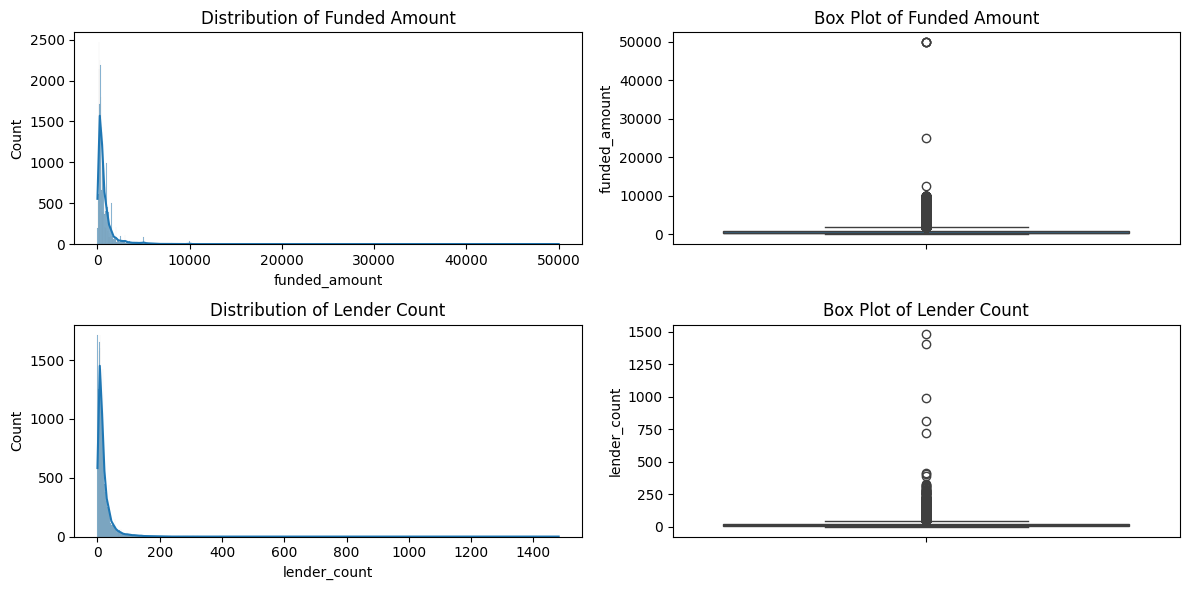

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate descriptive statistics
print("Descriptive Statistics for Funded Amount:")
print(df['funded_amount'].describe())
print("\nDescriptive Statistics for Lender Count:")
print(df['lender_count'].describe())

# Visualize distributions
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['funded_amount'], kde=True)
plt.title('Distribution of Funded Amount')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['funded_amount'])
plt.title('Box Plot of Funded Amount')

plt.subplot(2, 2, 3)
sns.histplot(df['lender_count'], kde=True)
plt.title('Distribution of Lender Count')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['lender_count'])
plt.title('Box Plot of Lender Count')

plt.tight_layout()
plt.show()

# Document observations (add this to the final report)
# Observations about the distributions, including skewness, outliers, ranges, and frequencies.

Descriptive Statistics for Funded Amount (after winsorizing):
count    33366.000000
mean       767.979530
std        937.737892
min          0.000000
25%        250.000000
50%        450.000000
75%        900.000000
max       5425.000000
Name: funded_amount, dtype: float64

Descriptive Statistics for Lender Count (after winsorizing):
count    33366.000000
mean        19.975211
std         22.265871
min          0.000000
25%          7.000000
50%         13.000000
75%         24.000000
max        130.350000
Name: lender_count, dtype: float64


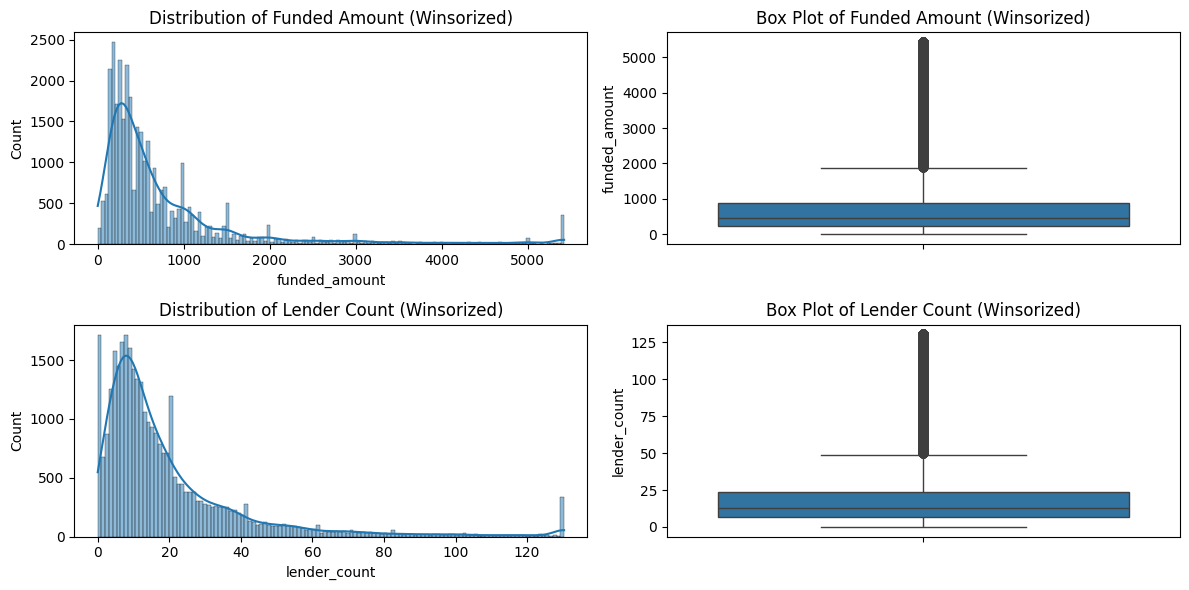

Winsorizing percentile used: 99th
Number of invalid dates encountered: 0


In [ ]:
import pandas as pd

# Winsorize 'Funded_amount' and 'Lender_count'
funded_amount_99th = df['funded_amount'].quantile(0.99)
df['funded_amount'] = df['funded_amount'].clip(upper=funded_amount_99th)

lender_count_99th = df['lender_count'].quantile(0.99)
df['lender_count'] = df['lender_count'].clip(upper=lender_count_99th)

# Convert 'Date' column to datetime objects
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Verification: Recalculate descriptive statistics and visualize
print("Descriptive Statistics for Funded Amount (after winsorizing):")
print(df['funded_amount'].describe())
print("\nDescriptive Statistics for Lender Count (after winsorizing):")
print(df['lender_count'].describe())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['funded_amount'], kde=True)
plt.title('Distribution of Funded Amount (Winsorized)')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['funded_amount'])
plt.title('Box Plot of Funded Amount (Winsorized)')

plt.subplot(2, 2, 3)
sns.histplot(df['lender_count'], kde=True)
plt.title('Distribution of Lender Count (Winsorized)')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['lender_count'])
plt.title('Box Plot of Lender Count (Winsorized)')

plt.tight_layout()
plt.show()

# Document the chosen percentile and invalid dates
print(f"Winsorizing percentile used: 99th")
invalid_dates = df['date'].isnull().sum()
print(f"Number of invalid dates encountered: {invalid_dates}")

In [ ]:
# Calculate Pearson correlation
pearson_corr = df['funded_amount'].corr(df['lender_count'])

# Calculate Spearman's rank correlation
spearman_corr = df['funded_amount'].corr(df['lender_count'], method='spearman')

# Calculate descriptive statistics
funded_amount_stats = df['funded_amount'].describe()
lender_count_stats = df['lender_count'].describe()

# Print and document the results
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"Spearman's rank correlation coefficient: {spearman_corr}")
print("\nDescriptive Statistics for Funded Amount:")
print(funded_amount_stats)
print("\nDescriptive Statistics for Lender Count:")
print(lender_count_stats)

# Explain which correlation measure is more appropriate
print("\nAnalysis:")
print("Both Pearson and Spearman correlation coefficients were calculated to assess the relationship between 'Funded_amount' and 'Lender_count'.")
print(f"Given that the distribution of 'funded_amount' and 'lender_count' are skewed (as observed in the previous exploration step), Spearman's rank correlation is more appropriate.  ")
print("Spearman's correlation is less sensitive to outliers and non-linear relationships, making it more robust for non-normal distributions.")

Pearson correlation coefficient: 0.8266360769171512
Spearman's rank correlation coefficient: 0.8457947284743876

Descriptive Statistics for Funded Amount:
count    33366.000000
mean       767.979530
std        937.737892
min          0.000000
25%        250.000000
50%        450.000000
75%        900.000000
max       5425.000000
Name: funded_amount, dtype: float64

Descriptive Statistics for Lender Count:
count    33366.000000
mean        19.975211
std         22.265871
min          0.000000
25%          7.000000
50%         13.000000
75%         24.000000
max        130.350000
Name: lender_count, dtype: float64

Analysis:
Both Pearson and Spearman correlation coefficients were calculated to assess the relationship between 'Funded_amount' and 'Lender_count'.
Given that the distribution of 'funded_amount' and 'lender_count' are skewed (as observed in the previous exploration step), Spearman's rank correlation is more appropriate.  
Spearman's correlation is less sensitive to outliers an

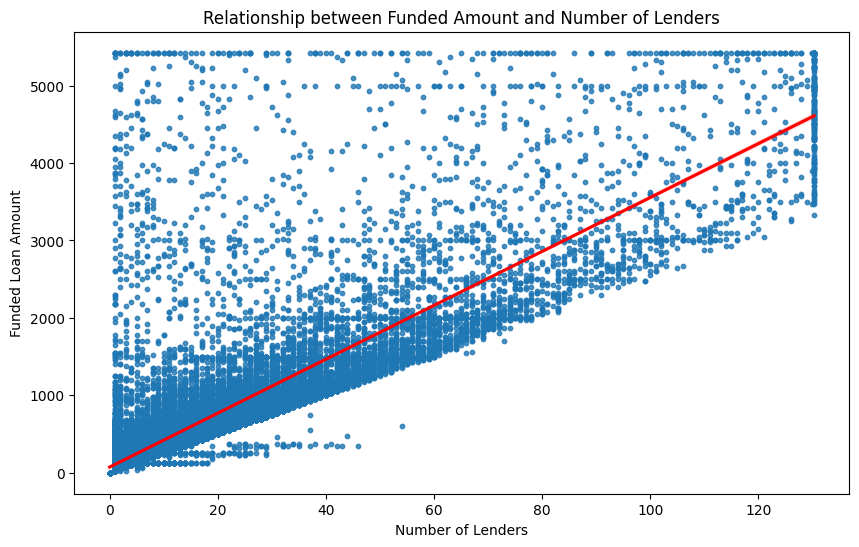

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='lender_count', y='funded_amount', data=df, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel("Number of Lenders")
plt.ylabel("Funded Loan Amount")
plt.title("Relationship between Funded Amount and Number of Lenders")
plt.show()